In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [2]:
alpha = 0.00001
I = np.array([ [1.,0,0],[0,1.,0],[0,0,1.] ])
Fout = np.array( [ [3./5.,0,0],[0,12./20.,0],[0,0,2./3.] ])
Fin = np.array( [ [0.,5./20.,8./30.],[1./5.,0.,12./30.],[2./5.,7./20.,0.] ])

T = I + alpha*(-Fout + Fin)
print(np.round(T,6))

[[9.99994e-01 2.00000e-06 3.00000e-06]
 [2.00000e-06 9.99994e-01 4.00000e-06]
 [4.00000e-06 4.00000e-06 9.99993e-01]]


In [3]:
beta = np.array([8,4,1])
gamma = 0.6

In [4]:
Ptot = np.array([50,20,30])
Ia = np.array([0,0,1])
Ra = np.array([0.,0.,0.])

Sa = Ptot - Ia 

Sp = np.array([Sa])
Ip = np.array([Ia])
Rp = np.array([Ra])

St = np.array([np.sum(Sa)])
It = np.array([np.sum(Ia)])
Rt = np.array([np.sum(Ra)])

ttotal = np.array([0.])

In [5]:
Tmax = 10
dt = 0.001
t = 0.

while (t < Tmax):
    
    Sa = np.matmul(T,Sa)
    Ia = np.matmul(T,Ia)
    Ra = np.matmul(T,Ra)
    Ptot = Sa + Ra + Ia
    
    Sa += -beta*Sa*Ia*dt/Ptot
    Ia += beta*Sa*Ia*dt/Ptot - gamma*Ia*dt
    Ra += gamma*Ia*dt 
    
    t += dt
    
    St = np.concatenate( (St , [np.sum(Sa)]), axis=0 )
    It = np.concatenate( (It , [np.sum(Ia)]), axis=0 )
    Rt = np.concatenate( (Rt , [np.sum(Ra)]), axis=0 )
    
    Sp = np.concatenate( (Sp , [Sa]), axis=0 )
    Ip = np.concatenate( (Ip , [Ia]), axis=0 )
    Rp = np.concatenate( (Rp , [Ra]), axis=0 )
    
    ttotal = np.concatenate((ttotal, [t]), axis=0)

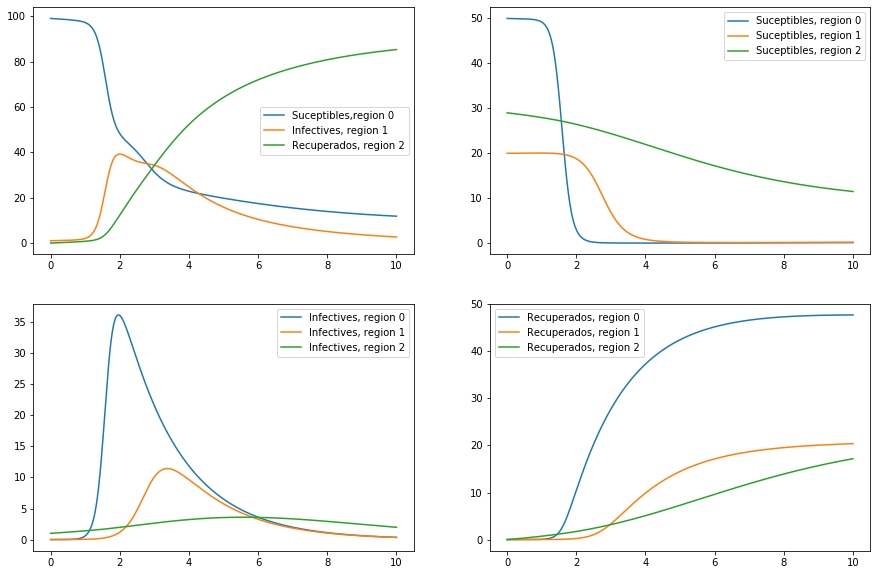

In [6]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)


ax.plot(ttotal,St,label='Suceptibles,region %i' %(0))
ax.plot(ttotal,It,label='Infectives, region %i' %(1))
ax.plot(ttotal,Rt,label='Recuperados, region %i'%(2))
ax.legend()


for i in range(3):
    ax1.plot(ttotal,Sp[:,i],label=r'Suceptibles, region %i' %(i))
ax1.legend()   

for i in range(3):
    ax2.plot(ttotal,Ip[:,i],label='Infectives, region %i' %(i))
ax2.legend()

for i in range(3):
    ax3.plot(ttotal,Rp[:,i],label='Recuperados, region %i' %(i))
ax3.legend()

plt.show()

In [7]:
print(St[-1] + Rt[-1] + It[-1])

99.80145637894404
